In [3]:
%load_ext autoreload
%autoreload 2

from ksfdtw.utils import nearest_neighbor_interpolation
from ksfdtw.distance_measures import ed as ksfdtw_ed, usdtw as ksfdtw_usdtw

# Example Data

In [4]:
a = [0, 0, 1, 2, 1, 0, 1, 0, 0]
b = [0, 1, 2, 0, 0, 0, 0, 0, 1]

In [5]:
np.random.seed(42)
a1 = np.random.random(20)
b1 = np.random.random(20)

In [6]:
x = np.arange(0, 50, 0.5)
a2 = np.sin(x)
b2 = np.sin(x - 1)
random.seed(1)
for idx in range(len(b2)):
    if random.random() < 0.05:
        b2[idx] += (random.random() - 0.5) / 2

In [7]:
# type(a), type(b)

In [8]:
# plt.plot(a)
# plt.plot(b)

# ED

In [19]:
dist = 0
l = min(len(a1), len(b1))  # The original ed.distance can handle different lengths.
for i in range(0, l):
    dist += (a1[i] - b1[i]) ** 2
print("Distance: ", np.sqrt(dist))

Distance:  2.3275702573015664


In [20]:
%%time
distance = dtai_dtw.distance(a1, b1, window=4)
print(f"Distance: {distance}")

Distance: 0.9681751552406113
CPU times: user 299 μs, sys: 39 μs, total: 338 μs
Wall time: 302 μs


In [21]:
path = dtai_dtw.warping_path(a1, b1, window=4)

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

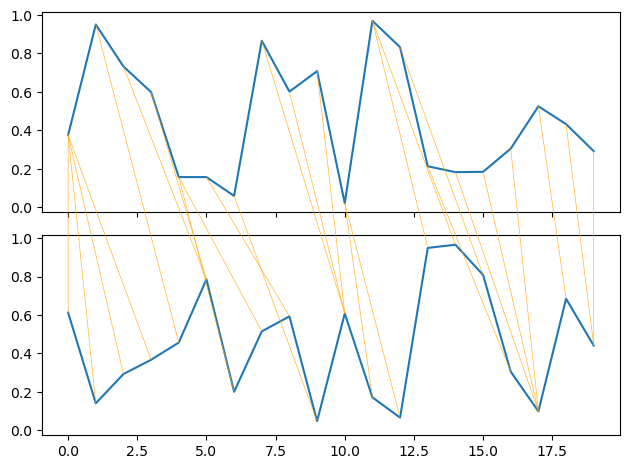

In [22]:
dtai_dtw_visualisation.plot_warping(a1, b1, path)

In [23]:
# Test whether the local function is ED
dist = 0
for i in range(0, len(path)):
    dist += (a1[path[i][0]] - b1[path[i][1]]) ** 2
print("Distance: ", np.sqrt(dist))

Distance:  0.9681751552406113


# DTW

In [ ]:
dtai_dtw.distance_fast(array.array("d", a), array.array("d", b), use_pruning=True)

AttributeError: 'function' object has no attribute 'distance_fast'

In [ ]:
dtai_dtw.distance(a, b)

AttributeError: 'function' object has no attribute 'distance'

In [ ]:
(dist := aeon_dtw_distance(np.array(a), np.array(b)), math.sqrt(dist))

(1.1918394298999704, 1.0917139872237465)

In [ ]:
(dist := sktime_dtw_distance(np.array(a), np.array(b)), math.sqrt(dist))

(1.1918394298999704, 1.0917139872237465)

In [ ]:
pyts_dtw(a, b)

1.0917139872237465

In [ ]:
tslearn_dtw(a, b)

1.0917139872237465

In [ ]:
aeon_dtw_distance(np.array(a), np.array(b), window=0.2)

3.0

(Slow) sktime, dtai (normal), pyts, tslearn, dtai (C), aeon (Fast)

## Sakoe-Chiba band

In [ ]:
distance, paths = dtai_dtw.warping_paths_fast(
    np.array(a, dtype=np.double),
    np.array(b, dtype=np.double),
    # window=3+1
)
best_path = dtai_dtw.best_path(paths)
print(distance)
print(len(a), len(b))
print(acum_mat)
print(best_path)

1.7320508075688772
9 9
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf        inf        inf
         inf        inf        inf        inf        inf        inf
         inf        inf        inf]
 [       inf 0.23731278 0.33401212 0.34402487 0.34412206 0.35364829
  0.54193072 0.56944459 0.58632896 0.62550054 0.70632413 0.74376407
  0.77123765 0.83101784 1.01017984 1.17040718 1.24823278 1.25018989
  1.28048063 1.31739908 1.31903197]
 [       inf 0.41369604 0.84521948 0.73842948 0.67810096 0.60257199
  0.39047414 0.84648209 0.71748298 0.68713925 1.09951995 0.78527642
  1.07790617 1.17439599 0.83101986 0.83115374 0.84325006 1.0623166
  1.36242341 1.30791549 1.40403571]
 [       inf 0.43078798 0.72263459 0.84597172 0.77039454 0.66274205
  0.39407916 0.66017786 0.69516474 0.70117241 0.97063396 0.79507649
  0.96535352 1.17333691 0.85885736 0.86323853 0.83465803 0.93771415
  1.13210954 1.13311655 1.17009596]
 [       inf 0.430

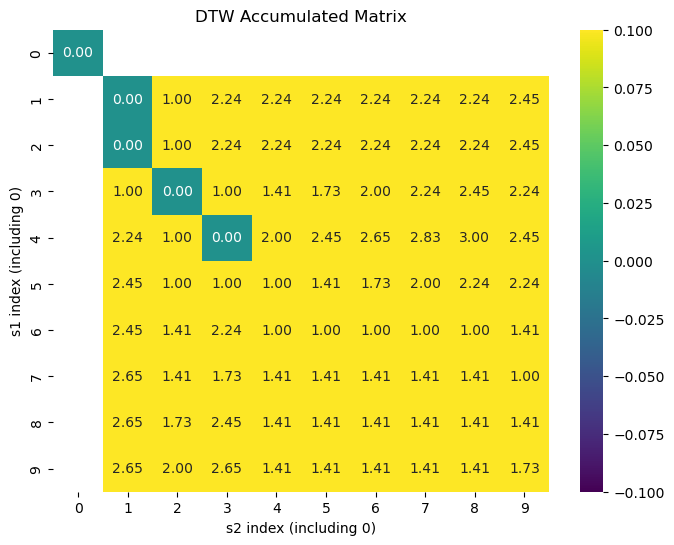

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(paths, annot=True, fmt=".2f", cmap="viridis")
plt.title("DTW Accumulated Matrix")
plt.xlabel("s2 index (including 0)")
plt.ylabel("s1 index (including 0)")
plt.show()

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

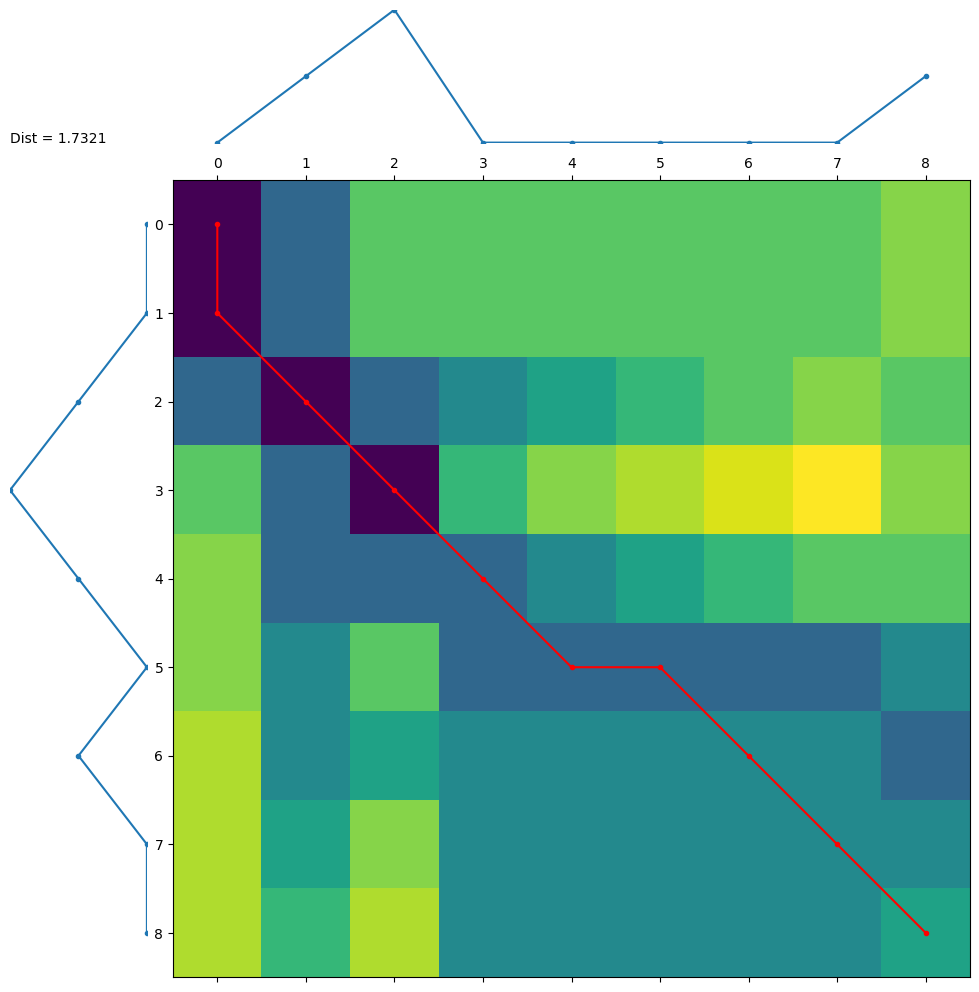

In [ ]:
dtai_dtw_visualisation.plot_warpingpaths(
    np.array(a, dtype=np.double), np.array(b, dtype=np.double), paths, best_path
)

In [ ]:
dist, mat = pyts_dtw(
    a, b, method="sakoechiba", options={"window_size": 1}, return_accumulated=True
)
dist, mat

(1.7320508075688772,
 array([[ 0.,  1., inf, inf, inf, inf, inf, inf, inf],
        [ 0.,  1.,  5., inf, inf, inf, inf, inf, inf],
        [inf,  0.,  1.,  2., inf, inf, inf, inf, inf],
        [inf, inf,  0.,  4.,  6., inf, inf, inf, inf],
        [inf, inf, inf,  1.,  2.,  3., inf, inf, inf],
        [inf, inf, inf, inf,  1.,  1.,  1., inf, inf],
        [inf, inf, inf, inf, inf,  2.,  2.,  2., inf],
        [inf, inf, inf, inf, inf, inf,  2.,  2.,  3.],
        [inf, inf, inf, inf, inf, inf, inf,  2.,  3.]]))

In [ ]:
tslearn_dtw(a, b, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)

1.7320508075688772

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
aeon_dtw_distance(x, y)  # 1D series

768.0